re- extracting the g140m data. First techniques from Bourrier papers. 

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [61]:
import stistools

In [62]:
path = '/home/david/work/muscles/trappist-1/hst/g140m_cals/'

In [63]:
dates = os.listdir(path)
dates= sorted(dates)
dates


['all_obs', 'staging', 'test']

Try just the test.

In [64]:
d1 = path + dates[2]

x1ds = glob.glob(d1+'/*x1d.fits')
x1ds

['/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01010_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v02010_x1d.fits']

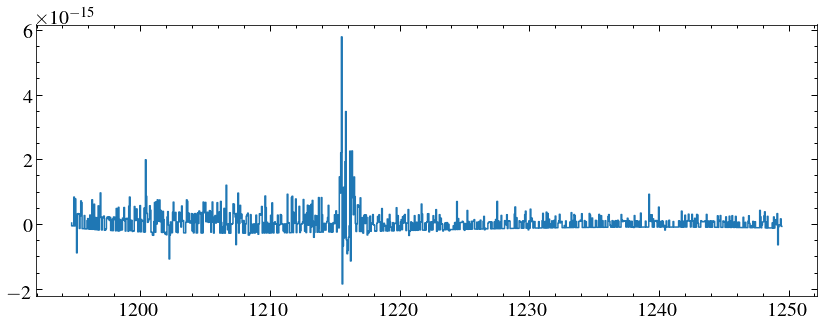

In [65]:
f = []
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    f.append(data['FLUX'])
w = data['WAVELENGTH']
f = np.mean(np.array(f), axis=0)
plt.step(w,f)

So the objective is to do better than that.

In [66]:
fits.getheader(x1ds[0],0)['XTRACTAB']

'oref$n7p10323o_1dx.fits'

In [67]:
os.environ['oref'] = d1

In [68]:
bg = fits.open(d1+'/n7p10323o_1dx.fits')
bg.info()

Filename: /home/david/work/muscles/trappist-1/hst/g140m_cals/test/n7p10323o_1dx.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      40   ()      
  1  1DX           1 BinTableHDU     79   343R x 18C   [16A, 8A, 1I, 1I, 1E, 1I, 8D, 1E, 1E, 1E, 1E, 1I, 8D, 1I, 12A, 1I, 67A, 67A]   


In [69]:
bgd = bg[1].data

In [70]:
bgd.names

['APERTURE',
 'OPT_ELEM',
 'CENWAVE',
 'SPORDER',
 'EXTRSIZE',
 'NCOEFFSL',
 'SLTCOEFF',
 'BK1SIZE',
 'BK2SIZE',
 'BK1OFFST',
 'BK2OFFST',
 'NCOEFFBK',
 'BKTCOEFF',
 'BACKORD',
 'XTRACALG',
 'MAXSRCH',
 'PEDIGREE',
 'DESCRIP']

In [71]:
bgd['CENWAVE']

array([1425, 1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400, 1420, 1470,
       1518, 1540, 1550, 1567, 1616, 1640, 1665, 1714, 1425, 1173, 1218,
       1222, 1272, 1321, 1371, 1387, 1400, 1420, 1470, 1518, 1540, 1550,
       1567, 1616, 1640, 1665, 1714, 1425, 1173, 1218, 1222, 1272, 1321,
       1371, 1387, 1400, 1420, 1470, 1518, 1540, 1550, 1567, 1616, 1640,
       1665, 1714, 1425, 1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400,
       1420, 1470, 1518, 1540, 1550, 1567, 1616, 1640, 1665, 1714, 1425,
       1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400, 1420, 1470, 1518,
       1540, 1550, 1567, 1616, 1640, 1665, 1714, 1425, 1173, 1218, 1222,
       1272, 1321, 1371, 1387, 1400, 1420, 1470, 1518, 1540, 1550, 1567,
       1616, 1640, 1665, 1714, 1425, 1173, 1218, 1222, 1272, 1321, 1371,
       1387, 1400, 1420, 1470, 1518, 1540, 1550, 1567, 1616, 1640, 1665,
       1714, 1425, 1173, 1218, 1222, 1272, 1321, 1371, 1387, 1400, 1420,
       1470, 1518, 1540, 1550, 1567, 1616, 1640, 16

In [72]:
hdr = fits.getheader(x1ds[0],0)

In [73]:
cw=hdr['CENWAVE']

In [74]:
bgd[(bgd['CENWAVE']==cw) & (bgd['OPT_ELEM']=='G140M') & (bgd['APERTURE']==hdr['APERTURE']+'D1')]

FITS_rec([('52X0.05D1', 'G140M', 1222, 1, 11., 1, [0., 0., 0., 0., 0., 0., 0., 0.], 5., 5., -30., 30., 1, [-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ], 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')],
         dtype=(numpy.record, [('APERTURE', 'S16'), ('OPT_ELEM', 'S8'), ('CENWAVE', '>i2'), ('SPORDER', '>i2'), ('EXTRSIZE', '>f4'), ('NCOEFFSL', '>i2'), ('SLTCOEFF', '>f8', (8,)), ('BK1SIZE', '>f4'), ('BK2SIZE', '>f4'), ('BK1OFFST', '>f4'), ('BK2OFFST', '>f4'), ('NCOEFFBK', '>i2'), ('BKTCOEFF', '>f8', (8,)), ('BACKORD', '>i2'), ('XTRACALG', 'S12'), ('MAXSRCH', '>i2'), ('PEDIGREE', 'S67'), ('DESCRIP', 'S67')]))

In [75]:
hdr['APERTURE']

'52X0.05'

So if I make a new 1dx file with the adjusted background regions and re-reduce with that, it should work?

In [122]:
nbg = fits.open(d1+'/new_bg_1dx.fits')

In [123]:
np.where((bgd['CENWAVE']==cw) & (bgd['OPT_ELEM']=='G140M') & (bgd['APERTURE']==hdr['APERTURE']+'D1'))

(array([60]),)

In [124]:
bgd[60]

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 14.0, 14.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

In [125]:
edit = nbg[1].data[60]
edit

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 5.0, 5.0, -30.0, 30.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

B+ use backround regions of 6 to 20 pixels. How does that convert into what to edit? Where is the width measuered from - before or after the offset? Doesn't say in handbook - helpdesk? Ok bkXoffset is the centre of the background region of width bkXsize. So...bkXsize =14, bkXoffest = 6+14/2 = 13? 

In [126]:
offset = 13
size =14
edit['BK1SIZE'], edit['BK2SIZE'] = size, size
edit['BK1OFFST'], edit['BK2OFFST'] = -offset, offset

In [127]:
edit

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 14.0, 14.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

In [128]:
nbg[1].data[60] = edit

In [129]:
nbg[1].data[60]


('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 14.0, 14.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

In [131]:
nbg.writeto(d1+'/new_bg_1dx.fits', overwrite=True)

In [132]:
nbg = fits.open(d1+'/new_bg_1dx.fits')
nbg[1].data[60]

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 14.0, 14.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

Right that seems to have worked, now to try re-reducing the data...

In [133]:
raws = glob.glob(d1+'/*raw.fits')
raws

['/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v02010_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01010_raw.fits']

In [134]:
for r in raws:
    print(fits.getheader(r,0)['XTRACTAB'])

oref$new_bg_1dx.fits
oref$new_bg_1dx.fits
oref$new_bg_1dx.fits


In [135]:
for r in raws:
    fits.setval(r, 'XTRACTAB', value ='oref$new_bg_1dx.fits')

In [136]:
for r in raws:
    print(fits.getheader(r,0)['XTRACTAB'])

oref$new_bg_1dx.fits
oref$new_bg_1dx.fits
oref$new_bg_1dx.fits


In [144]:
os.environ['oref'] = d1+'/'

In [147]:
for r in raws:
    rootname = fits.getheader(r,0)['ROOTNAME']
    stistools.calstis.calstis(r, outroot=d1+'/new_x1ds/'+rootname+'_new', wavecal=d1+'/od3v01020_wav.fits', verbose=True, trailer='recal.trl')

Appending to trailer file recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v02010_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v02010_raw.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/new_x1ds/od3v02010_new', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_wav.fits']
Appending to trailer file recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_raw.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/new_x1ds/od3v01020_new', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_wav.fits']
Appending to trailer file recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01010_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01010_r

Let's see how that went...

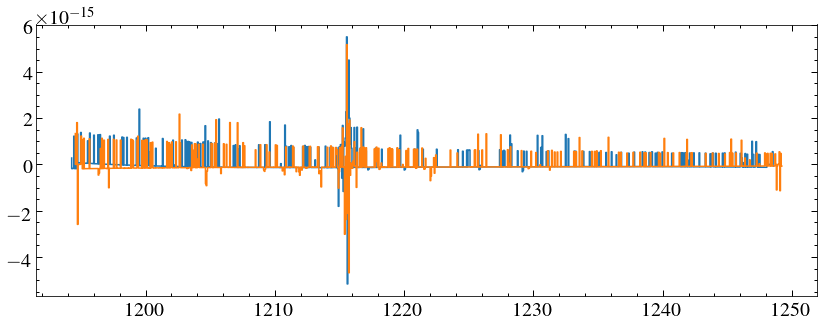

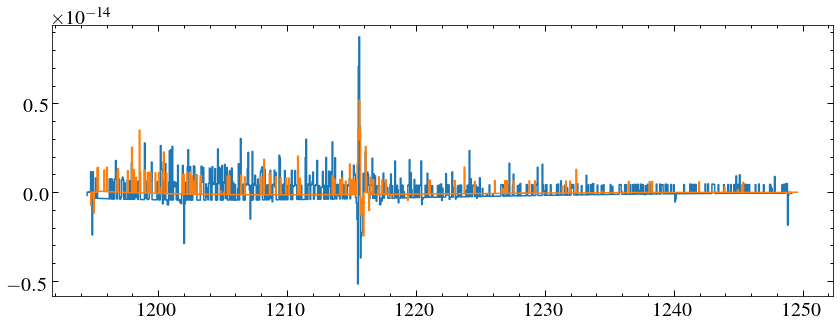

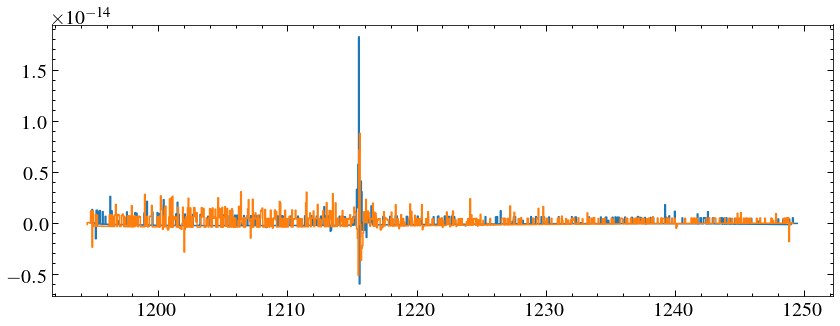

In [150]:
d2 = d1 + '/new_x1ds/'
new_x1ds = glob.glob(d2+'*x1d.fits')
for x, y in zip(new_x1ds, x1ds):
    data = fits.getdata(y, 1)[0]
    plt.step(data['WAVELENGTH'], data['FLUX'])
    data = fits.getdata(x, 1)[0]
    plt.step(data['WAVELENGTH'], data['FLUX'])
    plt.show()

(1212, 1220)

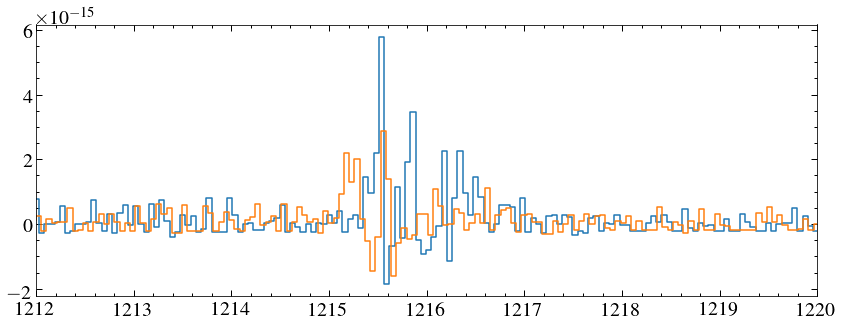

In [152]:
f_new = []
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    f_new.append(data['FLUX'])
w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
plt.step(w,f)
plt.step(w_new,f_new)
plt.xlim(1212, 1220)

Well it's different. Now for the rest. Grabbed a lot of data, hopefull has everything I need...

In [153]:
dates

['all_obs', 'staging', 'test']

In [154]:
d3 = path+'all_obs/'
d4 = path+'all_obs/new_extraction/'

In [157]:
x1ds = glob.glob(d3+'/*x1d.fits')

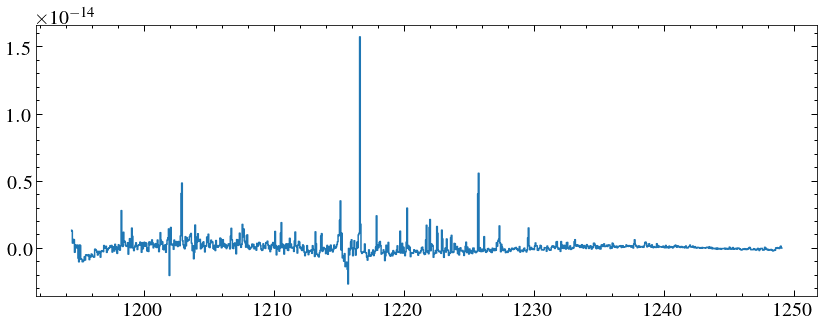

In [221]:
f_old = []
i = 0
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_old = data['WAVELENGTH']
        f_old.append(data['FLUX'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new)
        f_old.append(fi)
    i +-1
f_old = np.mean(np.array(f_old), axis=0)
plt.step(w_old,f_old)

In [159]:
raws = glob.glob(d3+'/*raw.fits')

In [160]:
for r in raws:
    fits.setval(r, 'XTRACTAB', value ='oref$new_bg_1dx.fits')

In [161]:
os.environ['oref'] = d3

In [164]:
for r in raws:
    rootname = fits.getheader(r,0)['ROOTNAME']
    stistools.calstis.calstis(r, outroot=d4+rootname+'_new', wavecal=d1+'/od3v01020_wav.fits', verbose=True, trailer='full_recal.trl')

Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsb1040_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhsb1040_raw.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/new_extraction/odhsb1040_new', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_wav.fits']
Appending to trailer file full_recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs31040_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs31040_raw.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/new_extraction/odhs31040_new', '-w', '/home/david/work/muscles/trappist-1/hst/g140m_cals/test/od3v01020_wav.fits']
Appending to trailer file full_recal.trl
Running calstis on /home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/odhs31050_raw.fits
  ['cs0.e', '-v', '/home/david/work/muscles/trappist-1/hst/g140m_cals/all_obs/o

In [166]:
new_x1ds = glob.glob(d4+'/*x1d.fits')

(1212, 1220)

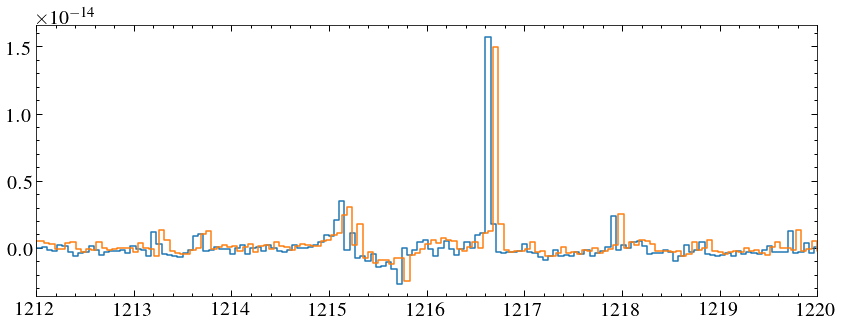

In [168]:
f_new = []
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    f_new.append(data['FLUX'])
w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
plt.step(w_old,f_old)
plt.step(w_new,f_new)
plt.xlim(1212, 1220)

Now sort by date.

In [174]:
dates =[]
for x in new_x1ds:
    date = fits.getheader(x, 0)['TDATEOBS']
    dates.append(date)

In [177]:
dates = np.unique(dates)
dates

array(['2016-09-26', '2016-09-30', '2016-11-23', '2016-12-25',
       '2017-09-03', '2017-09-04', '2017-09-14', '2017-09-17',
       '2017-09-22', '2017-09-28', '2017-10-13', '2017-10-17',
       '2017-10-18', '2017-11-09', '2017-11-13', '2018-05-06',
       '2018-05-31', '2018-08-05', '2018-09-10', '2018-09-11',
       '2018-12-01', '2018-12-07', '2018-12-09'], dtype='<U10')

In [178]:
f_dates = []

In [180]:
for d in dates:
    fd = []
    for x in new_x1ds:
        if fits.getheader(x, 0)['TDATEOBS'] == d:
            data = fits.getdata(x, 1)[0]
            fd.append(data['FLUX'])
    fd = np.mean(np.array(fd), axis=0)
    f_dates.append(fd)
    

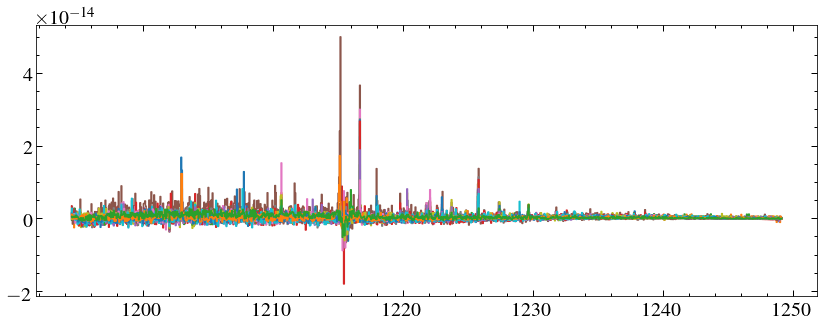

In [181]:
for fi in f_dates:
    plt.step(w_new, fi)

In [245]:
f_month = []
w_month = []
e_month = []
months = np.unique([d[:-3] for d in dates])
for d in months:
    fd = []
    ed = []
    i =0
    for x in new_x1ds:
        if fits.getheader(x, 0)['TDATEOBS'][:-3] == d:
            data = fits.getdata(x, 1)[0]
            if i == 0:
                wd = data['WAVELENGTH']
                fd.append(data['FLUX'])
                ed.append(data['ERROR'])
                w_month.append(wd) 
            else:
                fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'],fill_value='extrapolate')(wd)
                fd.append(fi)
                ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'],fill_value='extrapolate')(wd)
                ed.append(ei)
            i += 1
    fd = np.mean(np.array(fd), axis=0)
    ed = np.mean(np.array(ed), axis=0)
    f_month.append(fd)
    e_month.append(ed)

2016-09


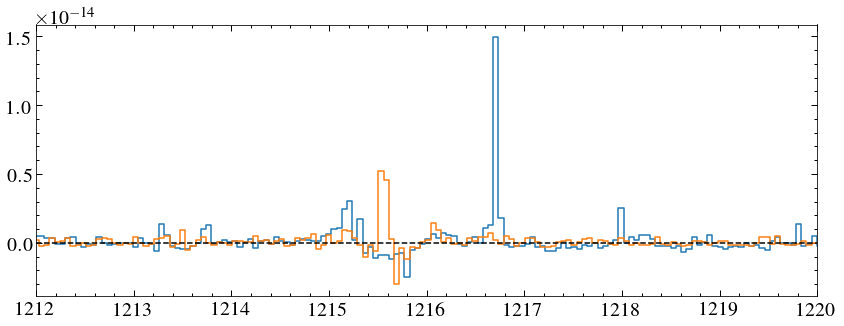

2016-11


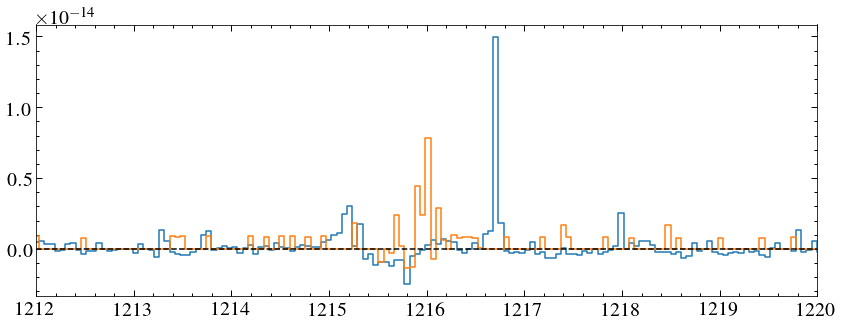

2016-12


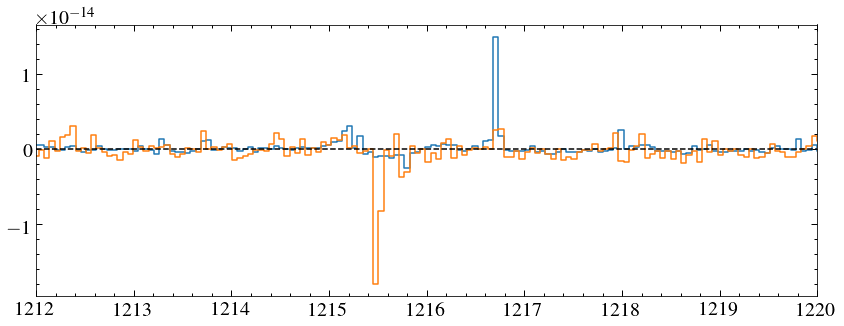

2017-09


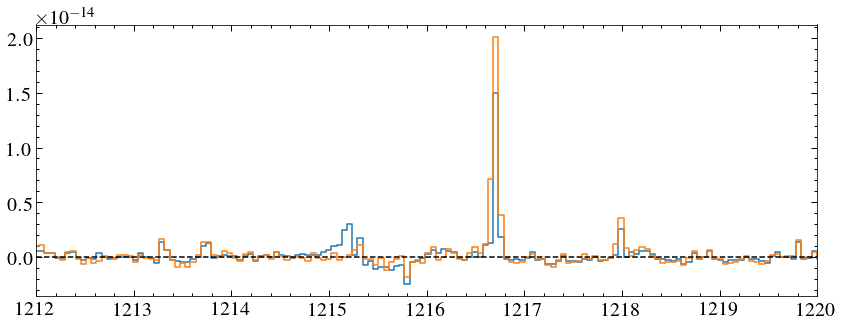

2017-10


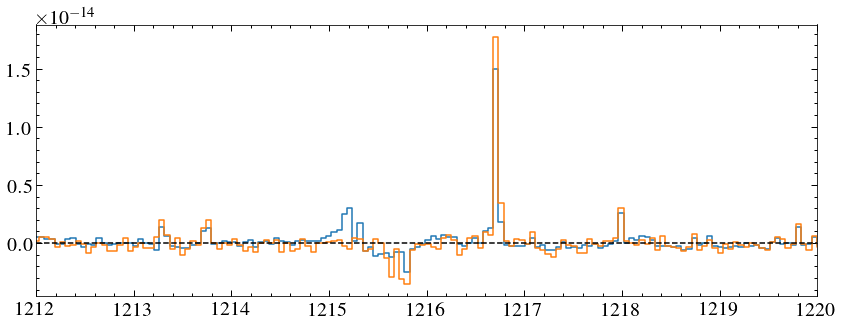

2017-11


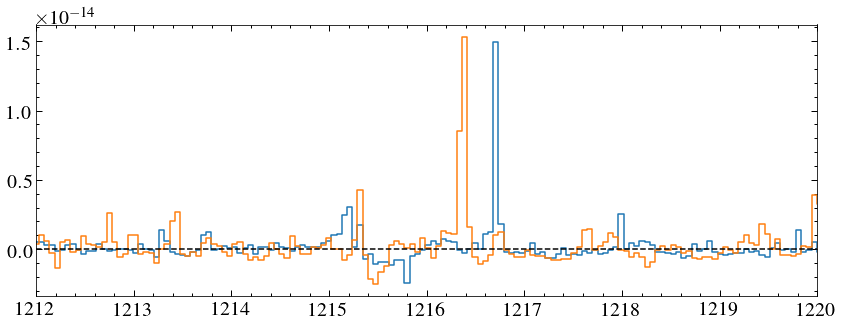

2018-05


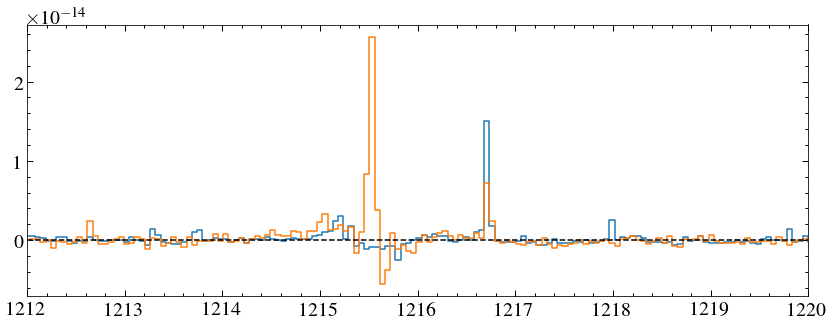

2018-08


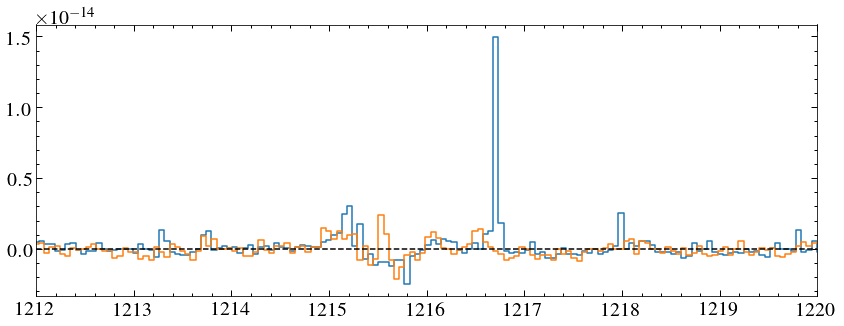

2018-09


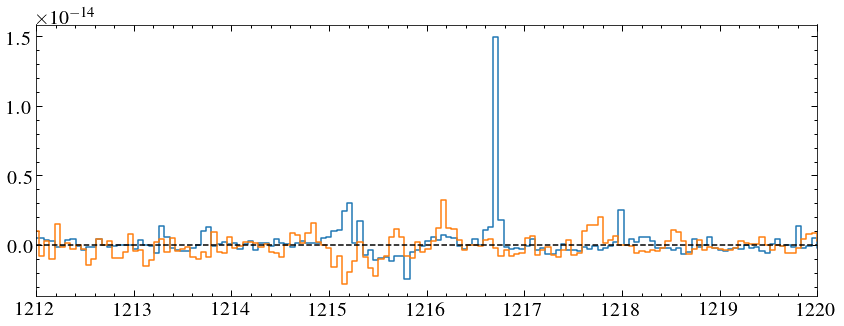

2018-12


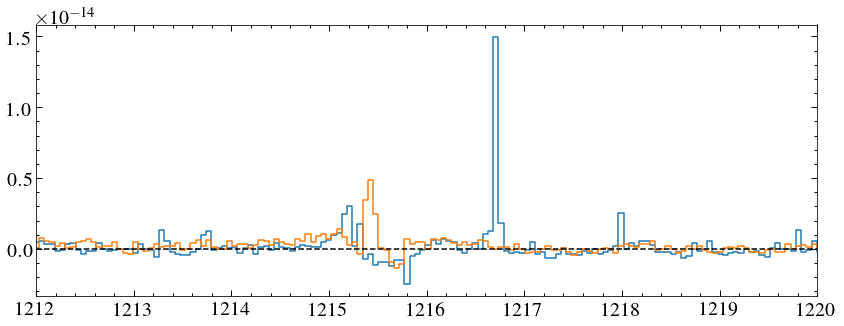

In [243]:
for wi, fi, m in zip(w_month,f_month,months) :
    plt.step(w_new, f_new)
    plt.step(w_new, fi)
    plt.xlim(1212, 1220)
    print(m)
    plt.axhline(0, c='k', ls ='--')
    plt.show()


In [197]:
len(f_month)

10

have I actually improved?

(1212, 1220)

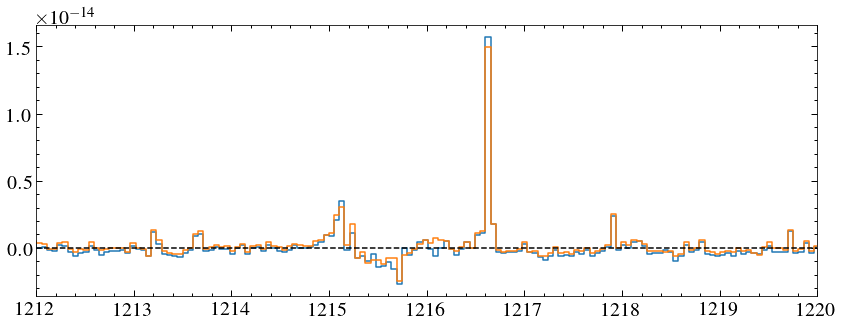

In [212]:
plt.step(w_old,f_old)
plt.step(w_old,f_new)
plt.axhline(0, c='k', ls ='--')
plt.xlim(1212, 1220)

In [209]:
old_month = []
#months = np.unique([d[:-3] for d in dates])
for d in months:
    fd = []
    i = 0
    for x in x1ds:
        if fits.getheader(x, 0)['TDATEOBS'][:-3] == d:
            data = fits.getdata(x, 1)[0]
                if i == 0:
        w_new2 = data['WAVELENGTH']
        f_new2.append(data['FLUX'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new2)
        f_new2.append(fi)
            fd.append(data['FLUX'])
    fd = np.mean(np.array(fd), axis=0)
    old_month.append(fd)

2016-09


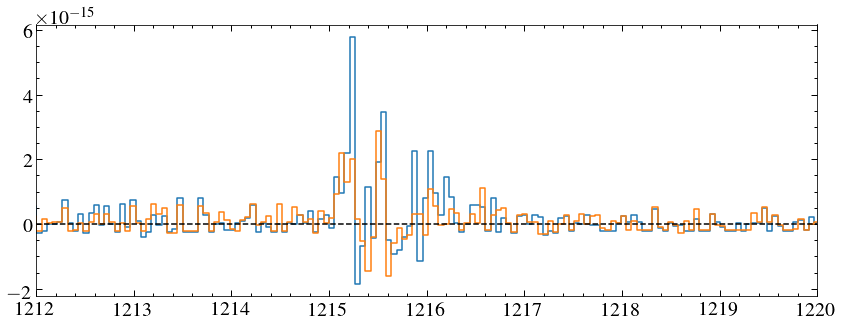

2016-11


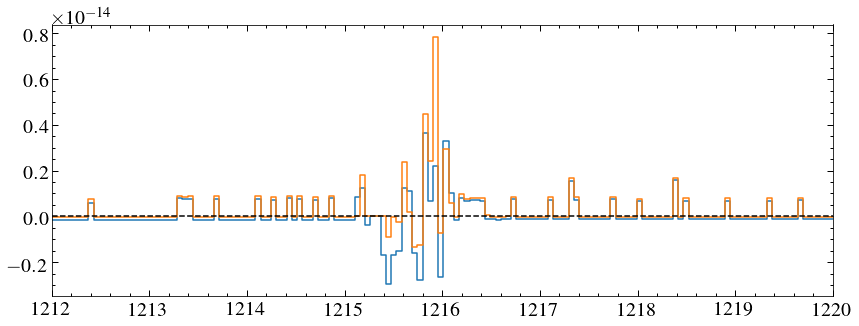

2016-12


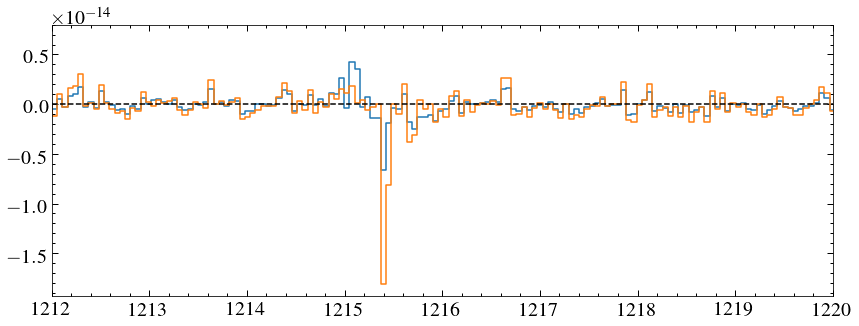

2017-09


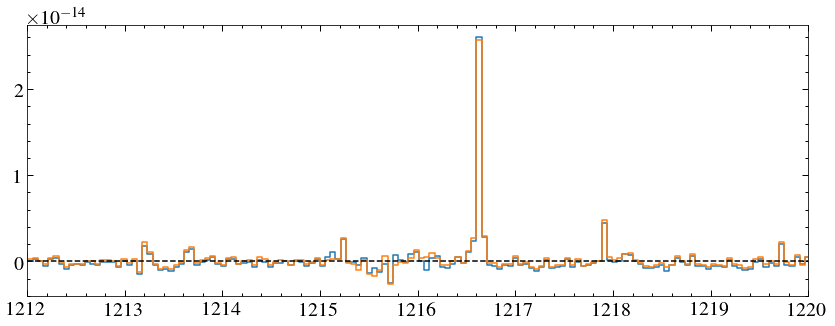

2017-10


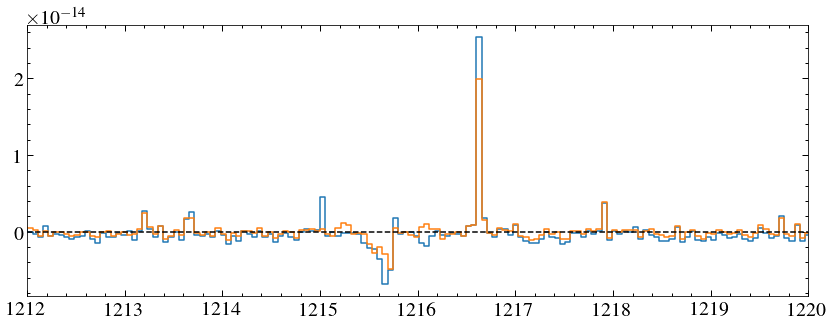

2017-11


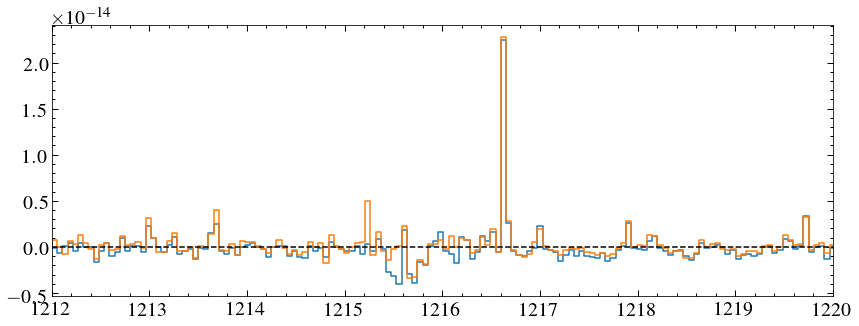

2018-05


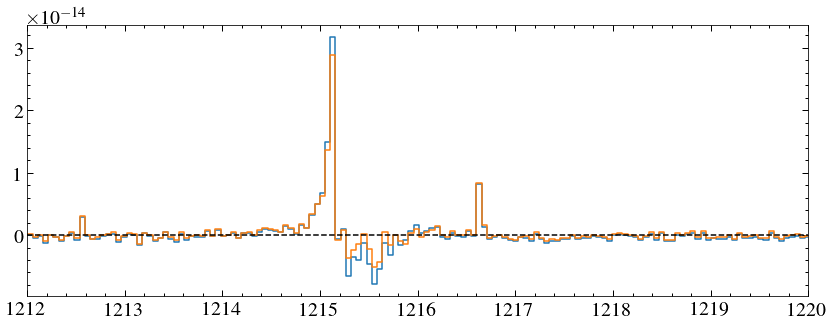

2018-08


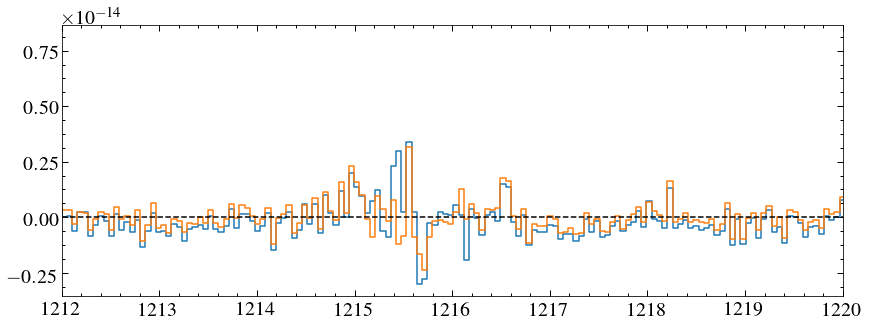

2018-09


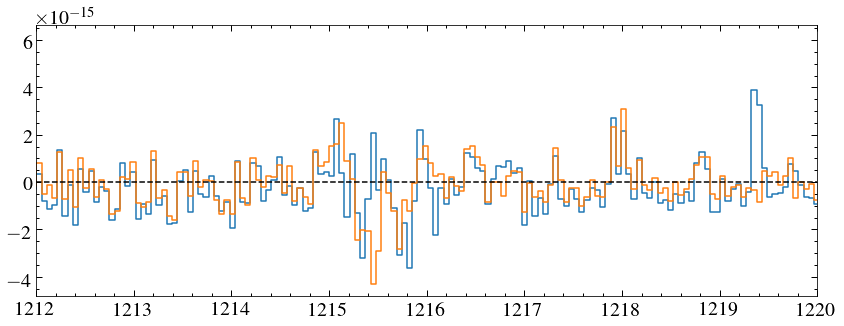

2018-12


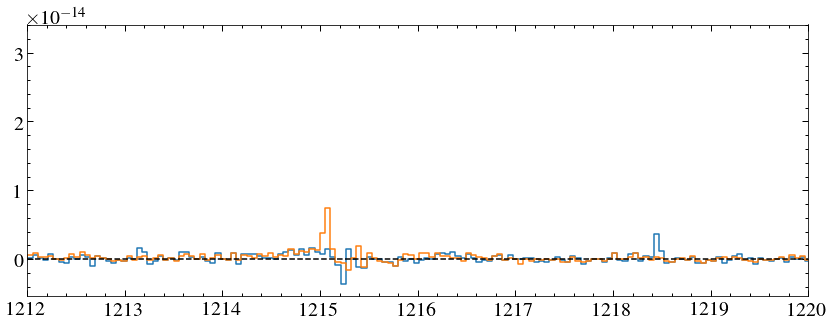

In [213]:
for fi, fo, m in zip(f_month,old_month, months) :
    plt.step(w_old, fo)
    plt.step(w_old, fi)
    plt.xlim(1212, 1220)
    print(m)
    plt.axhline(0, c='k', ls ='--')
    plt.show()

Need to do some wavelength interpolation in my coadds

5.800559275563544e-16 1.0488375149203997e-15


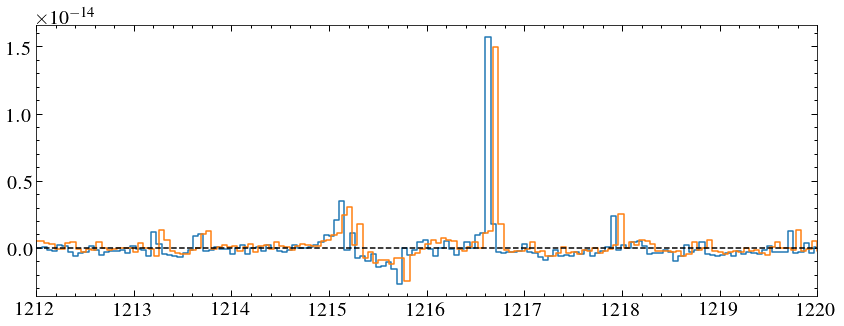

In [225]:
f_new = []
i = 0
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        f_new.append(data['FLUX'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new)
        f_new.append(fi)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i +-1
#w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
plt.step(w_old,f_old)
plt.step(w_new,f_new)
plt.xlim(1212, 1220)
plt.axhline(0, c='k', ls ='--')
old_int = np.trapz(f_old[(w_old >1214) & (w_old <1218)], w_old[(w_old >1214) & (w_old <1218)])
new_int = np.trapz(f_new[(w_new >1214) & (w_new <1218)], w_new[(w_new >1214) & (w_new <1218)])
print(old_int, new_int)

What about an only 5-pixel wide bg?

In [227]:
offset = 13
size =5
edit['BK1SIZE'], edit['BK2SIZE'] = size, size
edit['BK1OFFST'], edit['BK2OFFST'] = -offset, offset
nbg[1].data[60] = edit
nbg.writeto(d3+'new_bg2_1dx.fits', overwrite=True)
nbg = fits.open(d3+'new_bg2_1dx.fits')
nbg[1].data[60]

('52X0.05D1', 'G140M', 1222, 1, 11.0, 1, array([0., 0., 0., 0., 0., 0., 0., 0.]), 5.0, 5.0, -13.0, 13.0, 1, array([-0.77999997,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ]), 0, 'Unweighted', 1024, 'INFLIGHT 29/05/97', 'Analysis from prop. 7064')

In [228]:
for r in raws:
    fits.setval(r, 'XTRACTAB', value ='oref$new_bg2_1dx.fits')

In [229]:
for r in raws:
    rootname = fits.getheader(r,0)['ROOTNAME']
    stistools.calstis.calstis(r, outroot=d4+rootname+'_new2', wavecal=d1+'/od3v01020_wav.fits', trailer='full_recal2.trl')

5.800559275563544e-16 4.668669508573373e-16


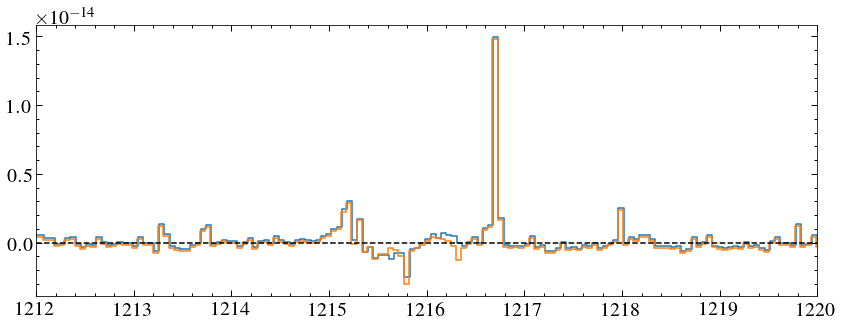

In [238]:
f_new2 = []
i = 0
new2_x1ds = glob.glob(d4+'*new2_x1d.fits')
for x in new2_x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new2 = data['WAVELENGTH']
        f_new2.append(data['FLUX'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new2)
        f_new2.append(fi)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i +-1
#w_new = data['WAVELENGTH']
f_new2 = np.mean(np.array(f_new2), axis=0)
#plt.step(w_old,f_old)
plt.step(w_new, f_new)
plt.step(w_new2,f_new2)
plt.xlim(1212, 1220)
plt.axhline(0, c='k', ls ='--')
old_int = np.trapz(f_old[(w_old >1214) & (w_old <1218)], w_old[(w_old >1214) & (w_old <1218)])
new_int = np.trapz(f_new2[(w_new2 >1214) & (w_new2 <1218)], w_new2[(w_new2 >1214) & (w_new2 <1218)])
print(old_int, new_int)

In [246]:
f_new = []
e_new = []
i = 0
new_x1ds = glob.glob(d4+'*new_x1d.fits')
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'])(w_new2)
        f_new2.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'])(w_new2)
        e_new.append(ei)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i +-1
#w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
e_new = np.mean(np.array(e_new), axis=0)


In [248]:
data = Table([w_new*u.AA, f_new*u.erg/u.cm**2/u.s/u.AA, e_new*u.erg/u.cm**2/u.s/u.AA], names = ['WAVELENGTH', 'FLUX', 'ERROR'] )
ascii.write(data, 'new_bk_means/TRAPPIST-1_G140M_newbk_mean.ecsv', delimiter=',', format='ecsv')

In [ ]:
for wm, fm, em, month in zip(w_month, f_month, e_month, months)
data = Table([w_m*u.AA, f_new*u.erg/u.cm**2/u.s/u.AA, e_new*u.erg/u.cm**2/u.s/u.AA], names = ['WAVELENGTH', 'FLUX', 'ERROR'] )
ascii.write(data, 'new_bk_means/TRAPPIST-1_G140M_newbk_mean.ecsv', delimiter=',', format='ecsv')